# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [141]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance
from google.colab import files
from IPython.display import Image



In [142]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [143]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [144]:
# put your answer here
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [145]:
# put your answer here
df.shape

(200, 5)

Show summary statistics using `describe()`. `(5 pts)`

In [146]:
# put your answer here
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [147]:
# put your answer here
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [148]:
# put your answer here
dt = df[['AnnualIncome','SpendingScore']]
dt.head()


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Display the first 10 rows. `(5 pts)`

In [149]:
# put your answer here
dt.head(10)

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

<Axes: title={'center': 'Annual Income vs Spending Score'}, xlabel='AnnualIncome', ylabel='SpendingScore'>

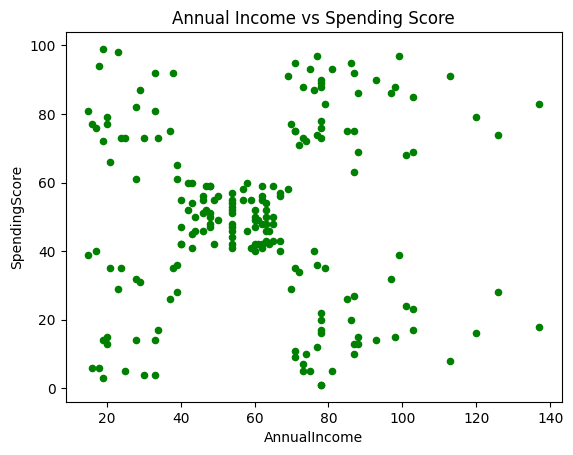

In [150]:
# put your answer here
dt.plot(kind='scatter', x='AnnualIncome', y='SpendingScore', title='Annual Income vs Spending Score', c="green")

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

For cluster = 1, SSE/WCSS is 269981.28000000014
For cluster = 2, SSE/WCSS is 181363.59595959607
For cluster = 3, SSE/WCSS is 106348.37306211119
For cluster = 4, SSE/WCSS is 73679.78903948837
For cluster = 5, SSE/WCSS is 44448.45544793369
For cluster = 6, SSE/WCSS is 37265.86520484345
For cluster = 7, SSE/WCSS is 30259.657207285458
For cluster = 8, SSE/WCSS is 25050.832307547524
For cluster = 9, SSE/WCSS is 21862.09267218289
For cluster = 10, SSE/WCSS is 19657.783608703947


Text(0, 0.5, 'WCSS')

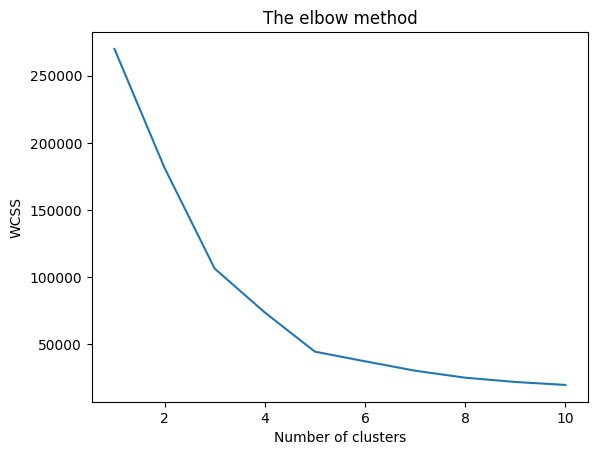

In [151]:
# put your answer here
wcss=[]
sse={}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [152]:
# put your answer here
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(dt)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))


[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


{np.int32(0): np.int64(81),
 np.int32(1): np.int64(22),
 np.int32(2): np.int64(39),
 np.int32(3): np.int64(35),
 np.int32(4): np.int64(23)}

## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

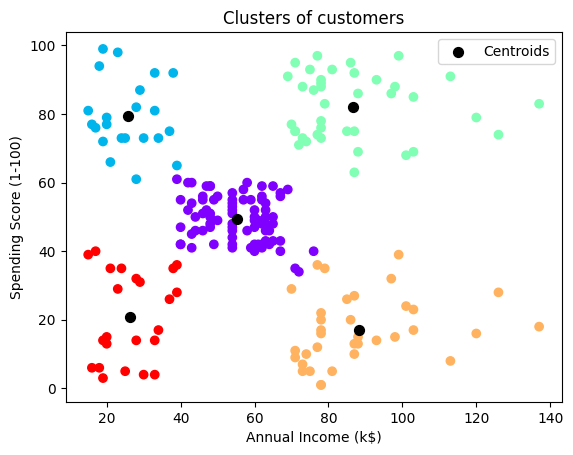

In [163]:
centroids = model_kmeans.cluster_centers_
plt.scatter(dt['AnnualIncome'], dt['SpendingScore'], c=pred_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='black', marker='o', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users? -> **Brown cluster**
- Which cluster represents low income, high spending users? -> **Blue cluster**
- Which cluster might represent target customers for promotions? -> **Purple cluster**
- What business insights can you derive from the clusters? -> Most of the customers are high spending, low income.

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [154]:
# put your answer here
df3d = pd.read_csv(dataseturl)
df3d = df[['Age','AnnualIncome','SpendingScore']]
df3d.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Visualize using a 3D scatter plot. `(5 pts)`

In [170]:
import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='AnnualIncome', z='SpendingScore', color=pred_kmeans, size="Age")
fig.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?

- What business insights can you derive from the clusters in 3D??

## **Answer**

Are there meaningfull and distinguishable cluster?
- None

What business insights can you derive from the cluster in 3D?
- The 3D plot reveals the high high income, high spending customers are young professionals, ages 18-30. This insight might help the marketing/advertisement team to target this customers.